## LAB2: Classificadores baseados em distâncias entre pontos

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: 
## Número: 

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab2.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

## Considere o ficheiro pickle $\texttt{Lab2-T51N-data.p}$
### Neste ficheiro encontra-se um dicionário de Python com as seguintes variáveis:
### 1. "data":          dados bi-dimensionais (4000 amostras)
### 2. "target":       classe dos dados (inteiros de 0 a 3)
### 3. "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
### 3. "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores


<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Classificadores da distância ao centroide:
## 1. Use os dados de treino para estimar os centroides de cada classe. Imprima os valores obtidos para cada classe, indicando a classe em questão.
## 2. Com a métrica de distância euclideana, calcule a matriz de confusão e o número total de erros nos dados de teste.
## 3. Explique brevemente porque é que mais de metade dos pontos da classe "1" não são bem classificados 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
D=pickle.load(open('Lab2-T51N-data.p','rb'))
print(D.keys())

dict_keys(['data', 'target', 'foldTrain', 'foldTest'])


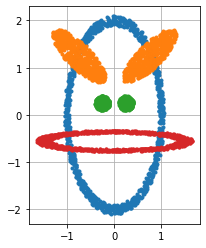

In [2]:
X=D.data
y=D.target
f1=D['foldTrain']
f2=D['foldTest']
plt.plot(X[0,y==0],X[1,y==0],'.')
plt.plot(X[0,y==1],X[1,y==1],'.')
plt.plot(X[0,y==2],X[1,y==2],'.')
plt.plot(X[0,y==3],X[1,y==3],'.')
plt.axis('scaled')
plt.grid(True)

In [3]:
X1=X[:,f1]
y1=y[f1]
X2=X[:,f2]
y2=y[f2]
m0=np.mean(X1[:,y1==0],axis=1)
print('Centroide da class 0:',m0)
m1=np.mean(X1[:,y1==1],axis=1)
print('Centroide da class 1:',m1)
m2=np.mean(X1[:,y1==2],axis=1)
print('Centroide da class 2:',m2)
m3=np.mean(X1[:,y1==3],axis=1)
print('Centroide da class 0:',m3)

Centroide da class 0: [-0.13243819  0.03660923]
Centroide da class 1: [-0.77640453  1.25665047]
Centroide da class 2: [0.01068383 0.25081224]
Centroide da class 0: [-0.0907223  -0.54198523]


[[ 49 283 151 417]
 [  0 376 524   0]
 [266   0 634   0]
 [  0   0   0 900]]
Nº total de erros no teste: 1641


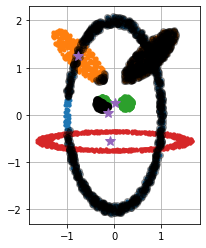

In [4]:
Xtmp=X2-m0[:,np.newaxis]
D0=np.sqrt(np.sum(Xtmp**2,axis=0))
Xtmp=X2-m1[:,np.newaxis]
D1=np.sqrt(np.sum(Xtmp**2,axis=0))
Xtmp=X2-m2[:,np.newaxis]
D2=np.sqrt(np.sum(Xtmp**2,axis=0))
Xtmp=X2-m3[:,np.newaxis]
D3=np.sqrt(np.sum(Xtmp**2,axis=0))

D=np.vstack((D0,D1,D2,D3))
y2e=np.argmin(D,axis=0)
print(confusion_matrix(y2,y2e))
print('Nº total de erros no teste:',np.sum(y2!=y2e))


#visualizar erros
plt.plot(X2[0,y2==0],X2[1,y2==0],'.')
plt.plot(X2[0,y2==1],X2[1,y2==1],'.')
plt.plot(X2[0,y2==2],X2[1,y2==2],'.')
plt.plot(X2[0,y2==3],X2[1,y2==3],'.')
plt.plot(X2[0,y2!=y2e],X2[1,y2!=y2e],'ok',alpha=.3)
M=np.vstack((m0,m1,m2,m3)).T
plt.plot(M[0,:],M[1,:],'*',ms=10)
plt.axis('scaled')
plt.grid(True)

### O centroide da classe "1" não é a média da classe

# Pergunta 2 - Classificadores dos k-vizinhos mais próximos:
## (Use os dados de treino nestes classificadores)
## 1. Para k=1, calcule a matriz de confusão e o número total de erros nos dados de teste. 
## 2. Faça um plot dos dados de teste por classe e dos erros cometidos por este classificador.
## 3. Repita as duas alíneas anteriores para k=5

[[837  35   0  28]
 [469 402  29   0]
 [  0   0 900   0]
 [ 40   0   0 860]]
Nº total de erros no teste: 601


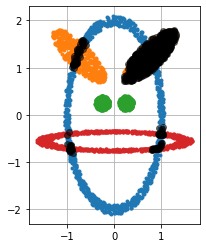

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1).fit(X1.T,y1)
y2e=knn.predict(X2.T)
print(confusion_matrix(y2,y2e))
print('Nº total de erros no teste:',np.sum(y2!=y2e))
plt.plot(X2[0,y2==0],X2[1,y2==0],'.')
plt.plot(X2[0,y2==1],X2[1,y2==1],'.')
plt.plot(X2[0,y2==2],X2[1,y2==2],'.')
plt.plot(X2[0,y2==3],X2[1,y2==3],'.')
plt.plot(X2[0,y2!=y2e],X2[1,y2!=y2e],'ok',alpha=0.5)
plt.axis('scaled')
plt.grid(True)

[[784  50   0  66]
 [459 400  41   0]
 [  0   0 900   0]
 [ 23   0   0 877]]
Nº total de erros no teste: 639


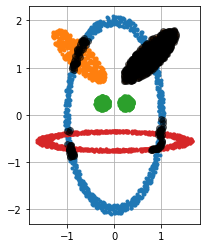

In [11]:
knn=KNeighborsClassifier(n_neighbors=5).fit(X1.T,y1)
y2e=knn.predict(X2.T)
print(confusion_matrix(y2,y2e))
print('Nº total de erros no teste:',np.sum(y2!=y2e))
plt.plot(X2[0,y2==0],X2[1,y2==0],'.')
plt.plot(X2[0,y2==1],X2[1,y2==1],'.')
plt.plot(X2[0,y2==2],X2[1,y2==2],'.')
plt.plot(X2[0,y2==3],X2[1,y2==3],'.')
plt.plot(X2[0,y2!=y2e],X2[1,y2!=y2e],'ok',alpha=0.5)
plt.axis('scaled')
plt.grid(True)

# Pergunta 3 - Matrizes de distância:
## Considere os dados "digits" do sklearn ()
## 1. Ordene os dados por classe, calcule e visualize a matriz de distâncias para o conjunto de dados, usando a distância euclideana
## 2. Repita a alínea anterior para a distância de cosseno

In [60]:
import sklearn.datasets as dt
D=dt.load_digits()
X=D.data
y=D.target

Text(0.5, 1.0, 'Cosseno')

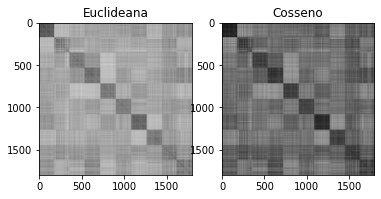

In [66]:
import scipy.spatial.distance as spd
idx=np.argsort(y)
X=X[idx,:]
y=y[idx]
D=spd.squareform(spd.pdist(X,'euclidean'))
plt.subplot(121)
plt.imshow(D,cmap='gray')
plt.title('Euclideana')
D=spd.squareform(spd.pdist(X,'cosine'))
plt.subplot(122)
plt.imshow(D,cmap='gray')
plt.title('Cosseno')